In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Survived = 1 表示幸存。

In [2]:
import pandas as pd

train_data = pd.read_csv('../Datasets/titanic/train.csv')
test_data = pd.read_csv('../Datasets/titanic/test.csv')

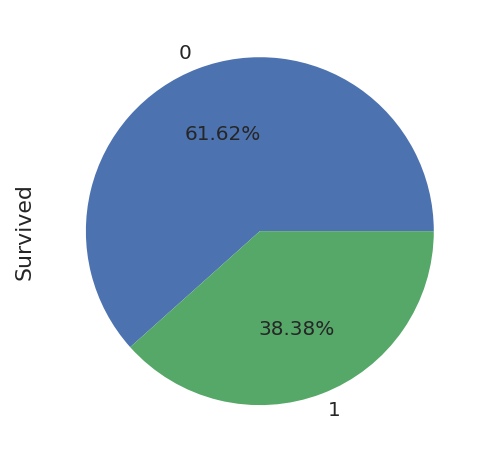

In [3]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')
plt.show()

In [4]:
train_data.Embarked[train_data.Embarked.isnull(
)] = train_data.Embarked.dropna().mode().values
train_data['Cabin'] = train_data.Cabin.fillna('U0')

from sklearn.ensemble import RandomForestRegressor

# choose training data to predict age
age_df = train_data[['Age', 'Survived', 'Fare', 'Parch', 'SibSp', 'Pclass']]
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]
X = age_df_notnull.values[:, 1:]
Y = age_df_notnull.values[:, 0]
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RFR.fit(X, Y)
predictAges = RFR.predict(age_df_isnull.values[:, 1:])
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train_data.groupby(['Sex','Survived'])['Sex'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

In [7]:
train_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [8]:
train_data.groupby(['Survived','Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

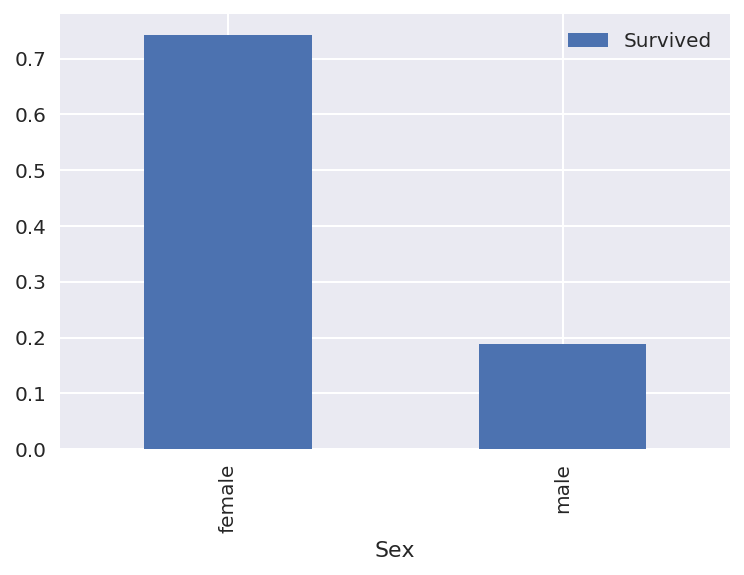

In [9]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

In [10]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

In [11]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


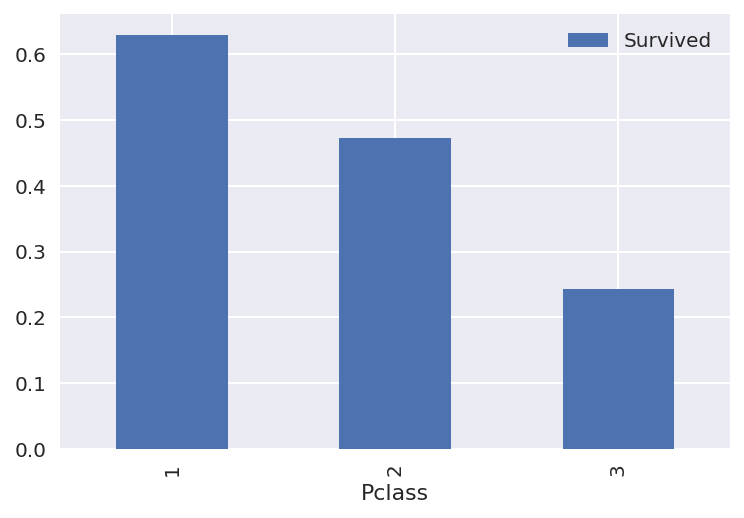

In [12]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

In [13]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

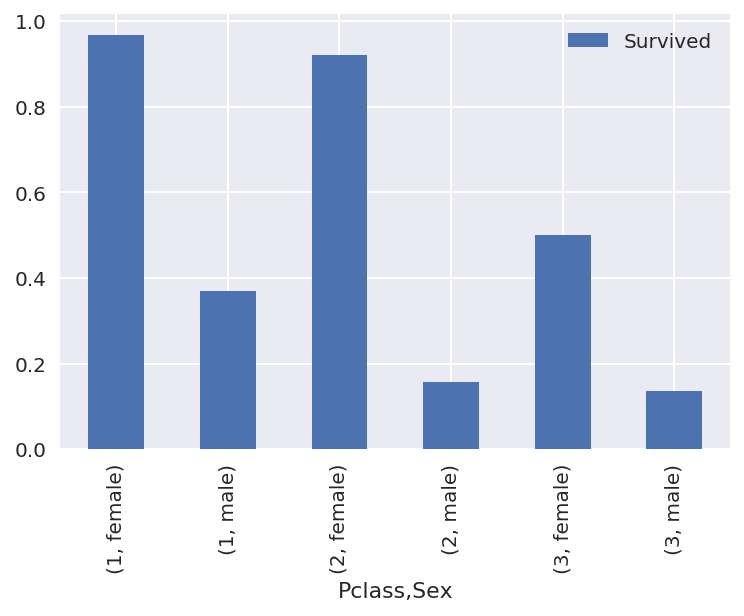

In [14]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [15]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

In [16]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

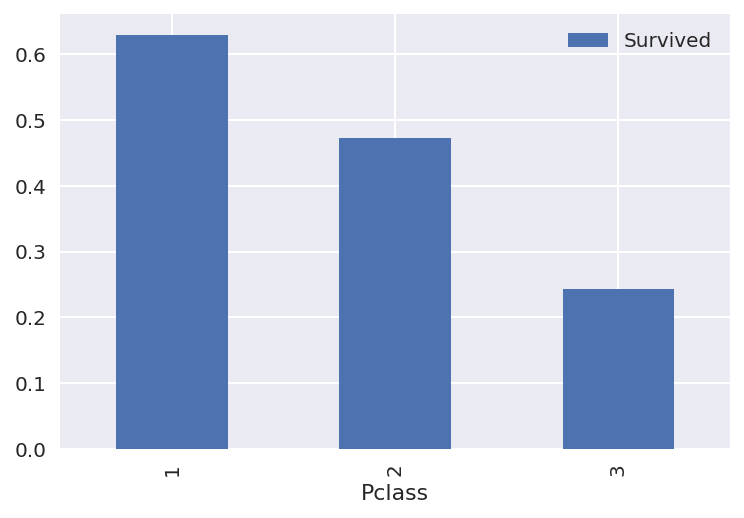

In [17]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

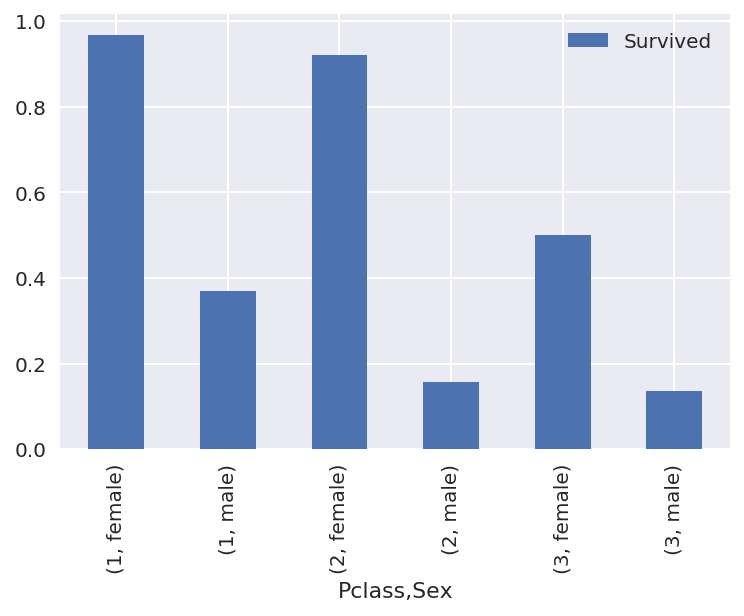

In [18]:
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()

In [19]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()

Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

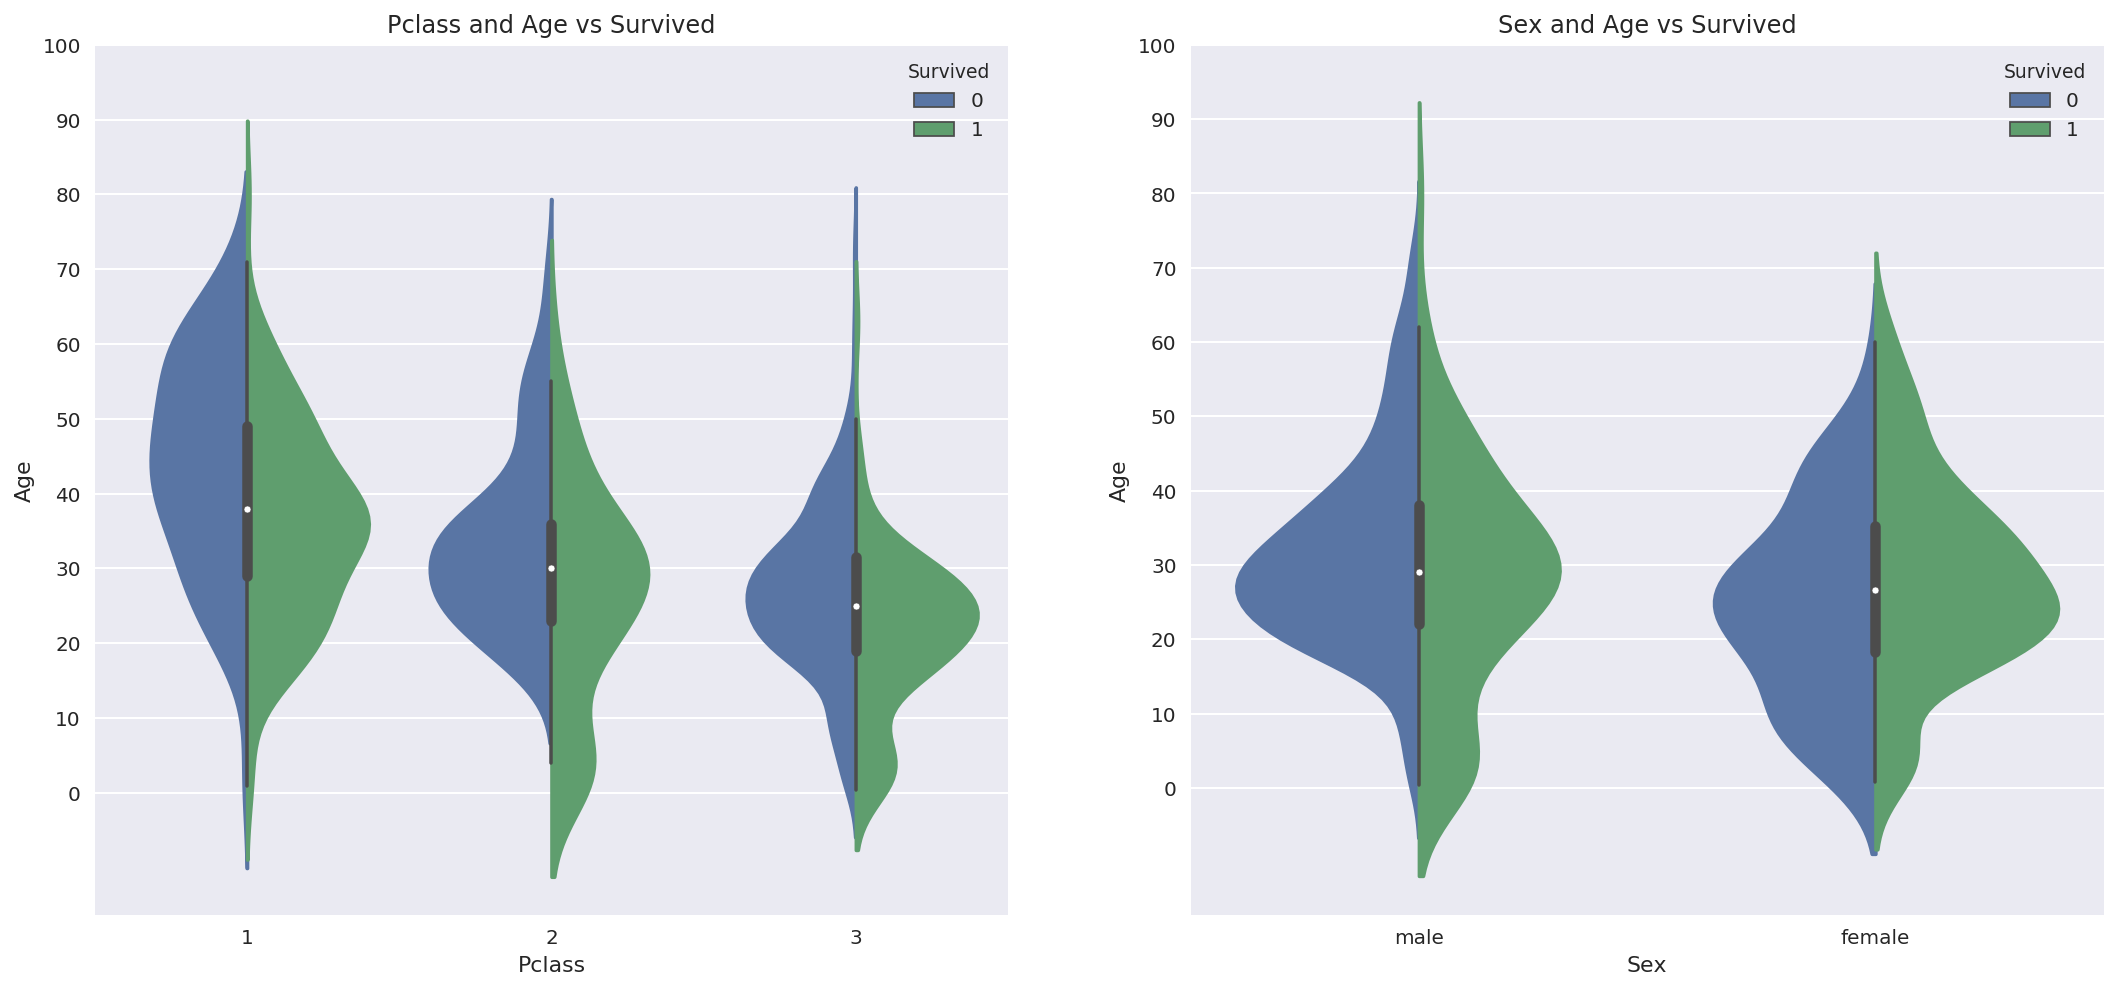

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()


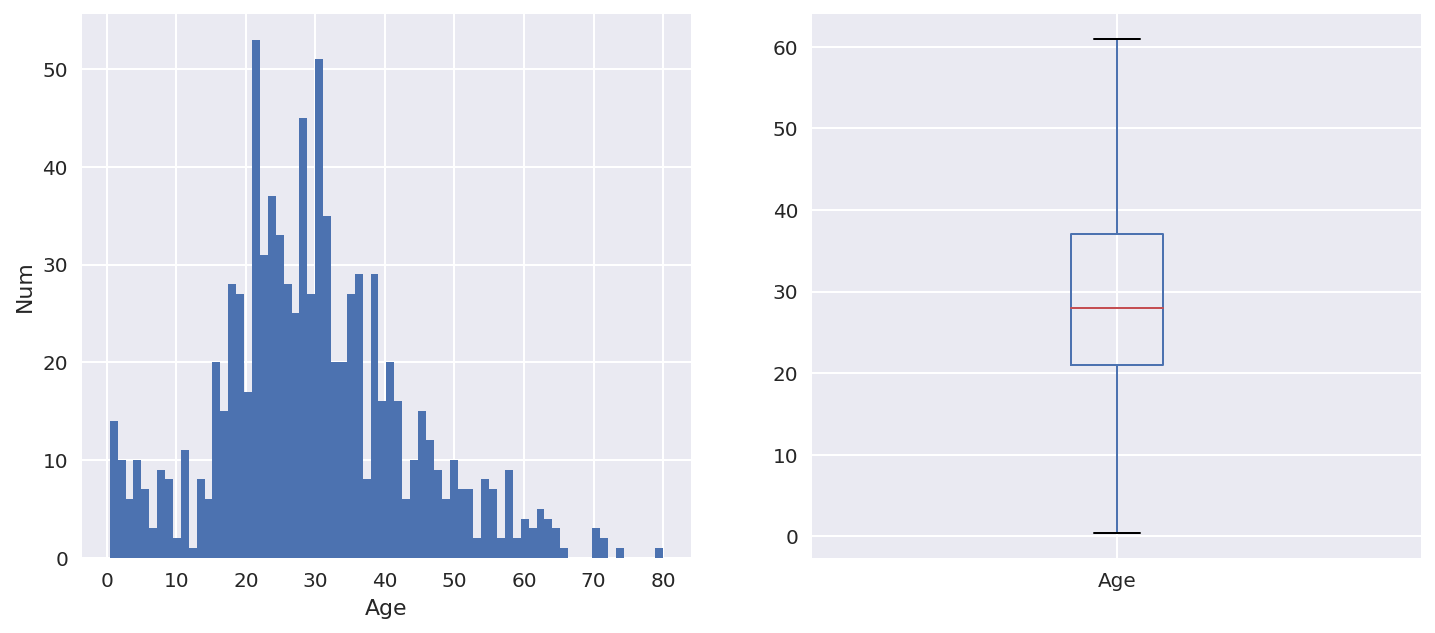

In [21]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)
plt.show()


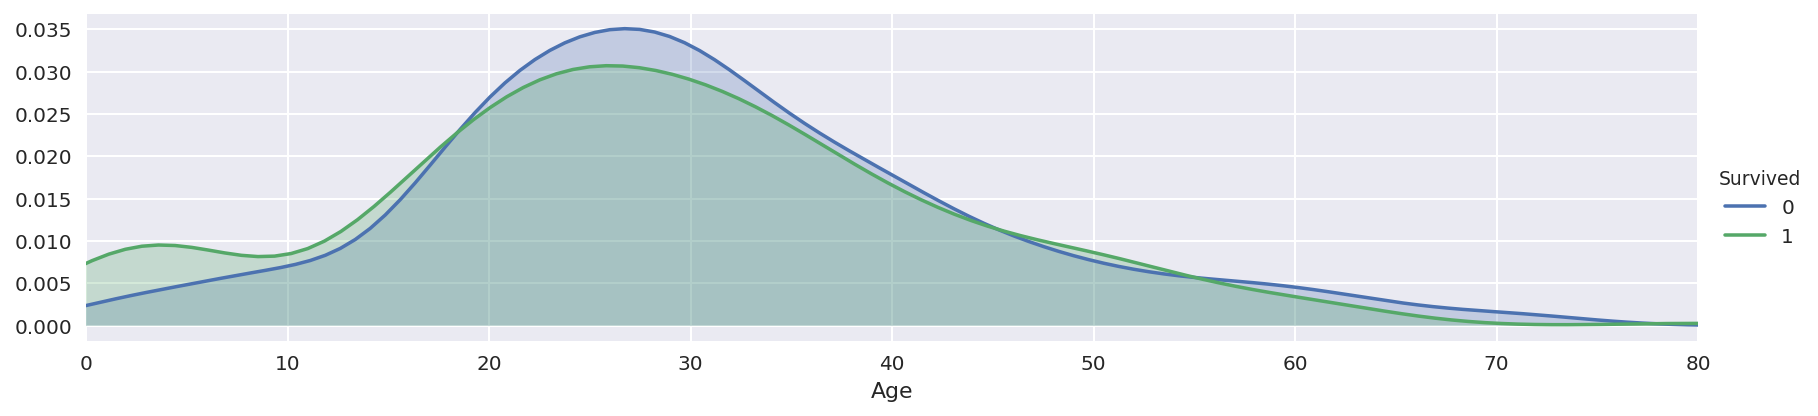

In [22]:
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

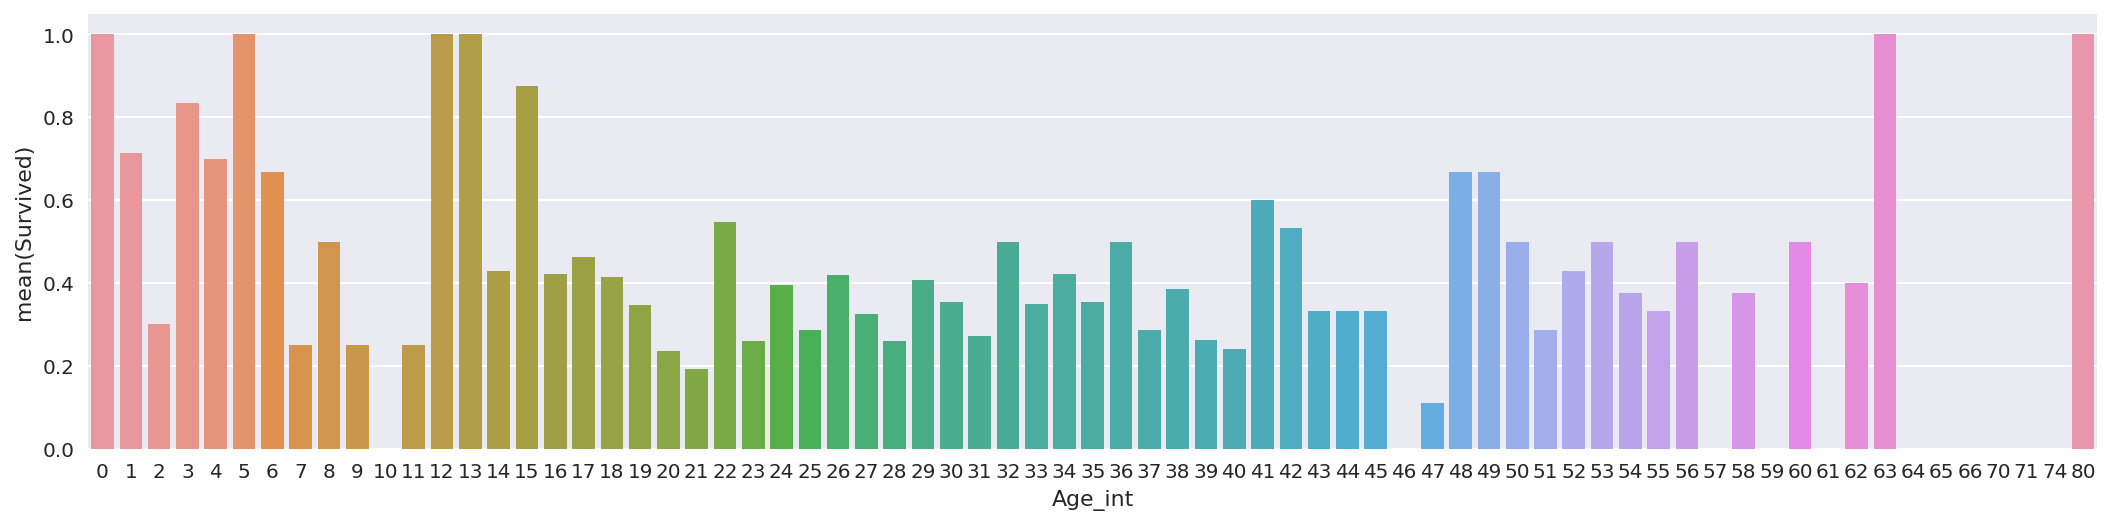

In [23]:
fig, axis1 = plt.subplots(1, 1, figsize=(18, 4))
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(
    ['Age_int'], as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

In [27]:
train_data['Age'].describe()

count    891.000000
mean      29.652959
std       13.730670
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
bins = [0, 12, 18, 65, 100]

In [30]:
train_data['Age_group'] =pd.cut(train_data['Age'], bins)

In [33]:
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age

Age_group
(0, 12]      0.506173
(12, 18]     0.466667
(18, 65]     0.364512
(65, 100]    0.125000
Name: Survived, dtype: float64

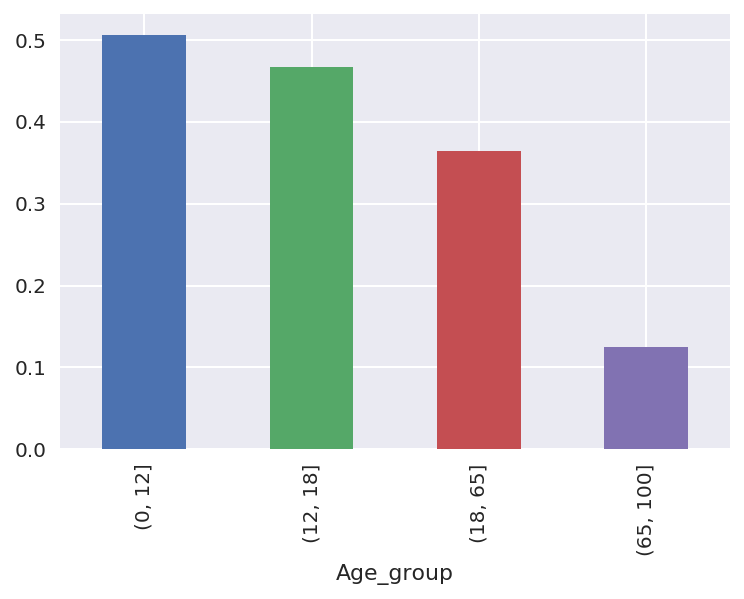

In [34]:
by_age.plot(kind = 'bar')

In [38]:
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [40]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Don           1
Ms            1
Capt          1
Mme           1
Countess      1
Lady          1
Jonkheer      1
Name: Title, dtype: int64

In [41]:
pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


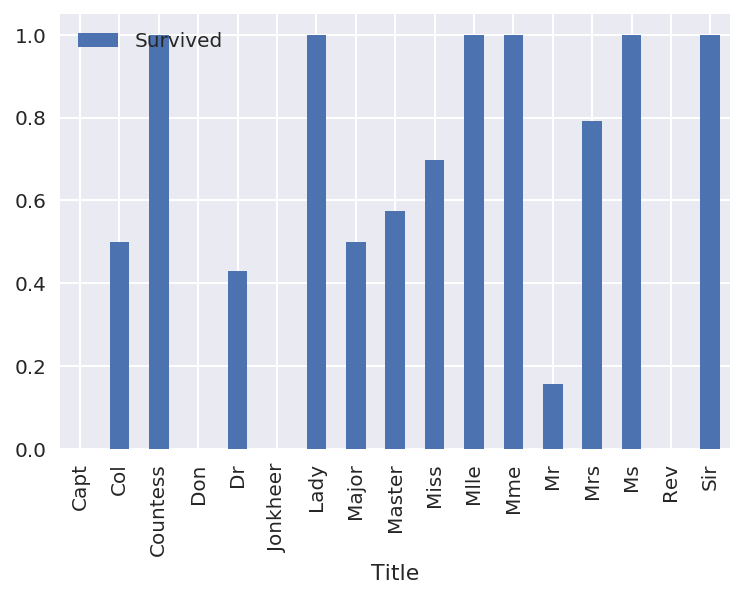

In [42]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

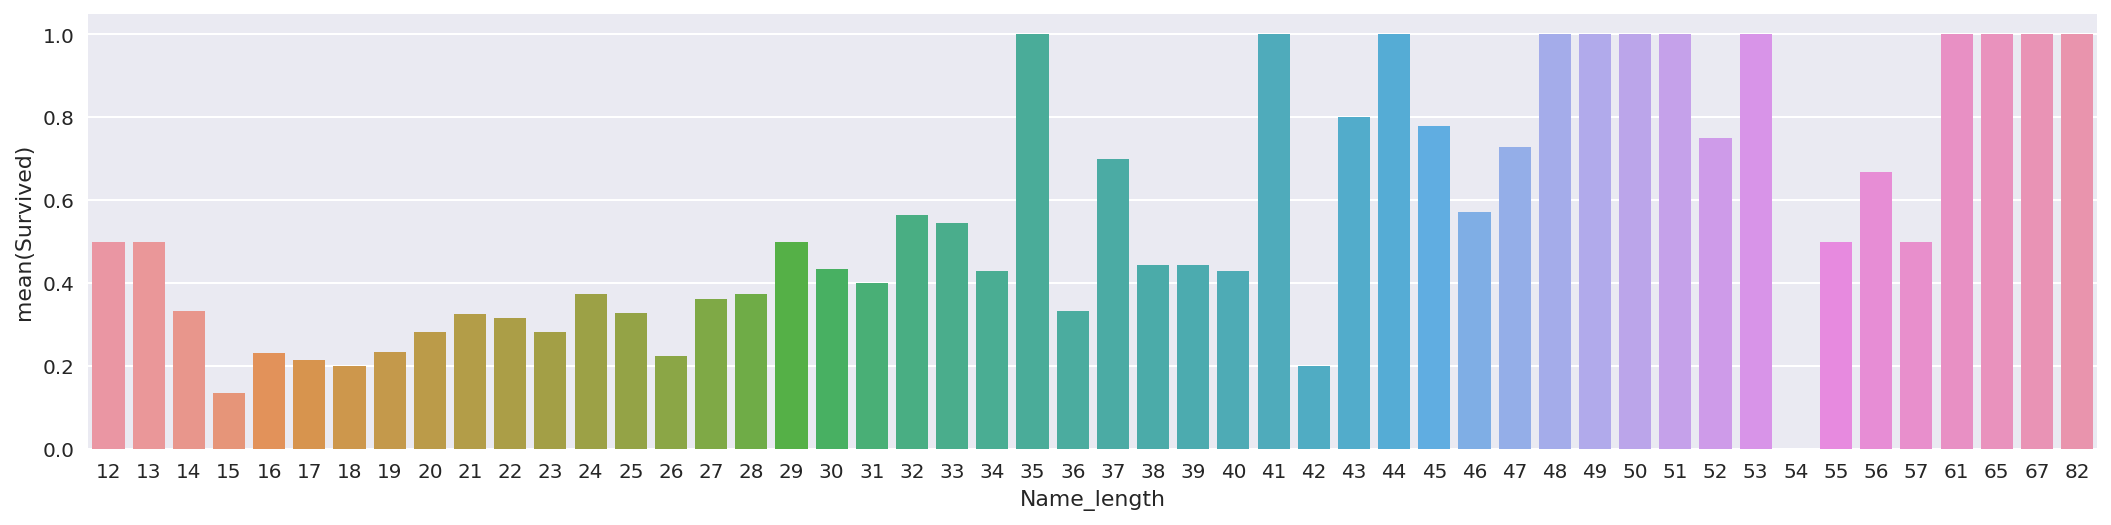

In [43]:
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

In [44]:
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

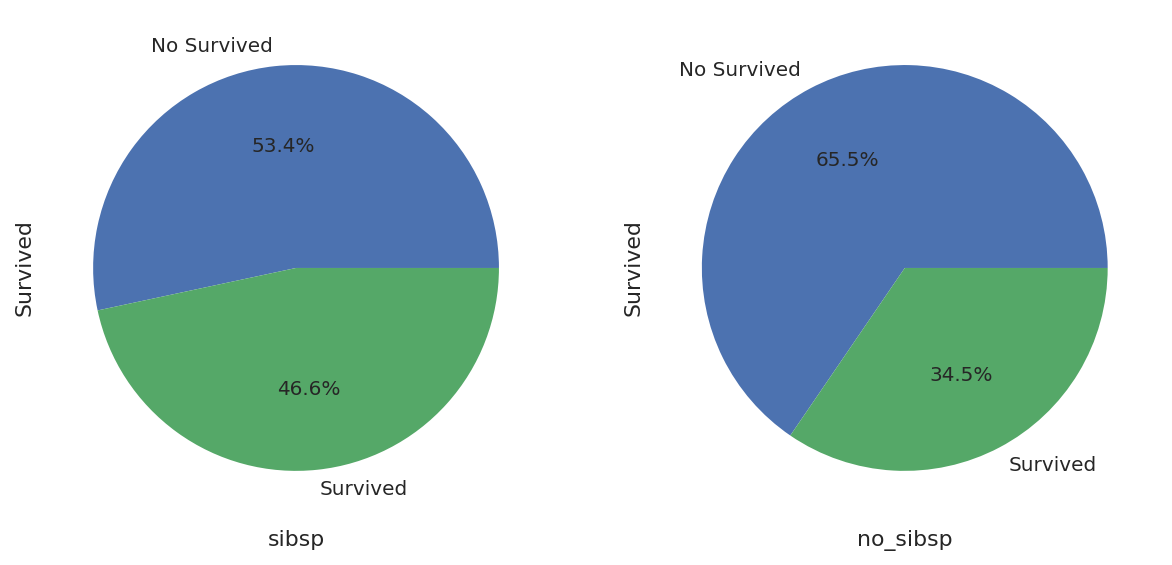

In [45]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

In [52]:
train_data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

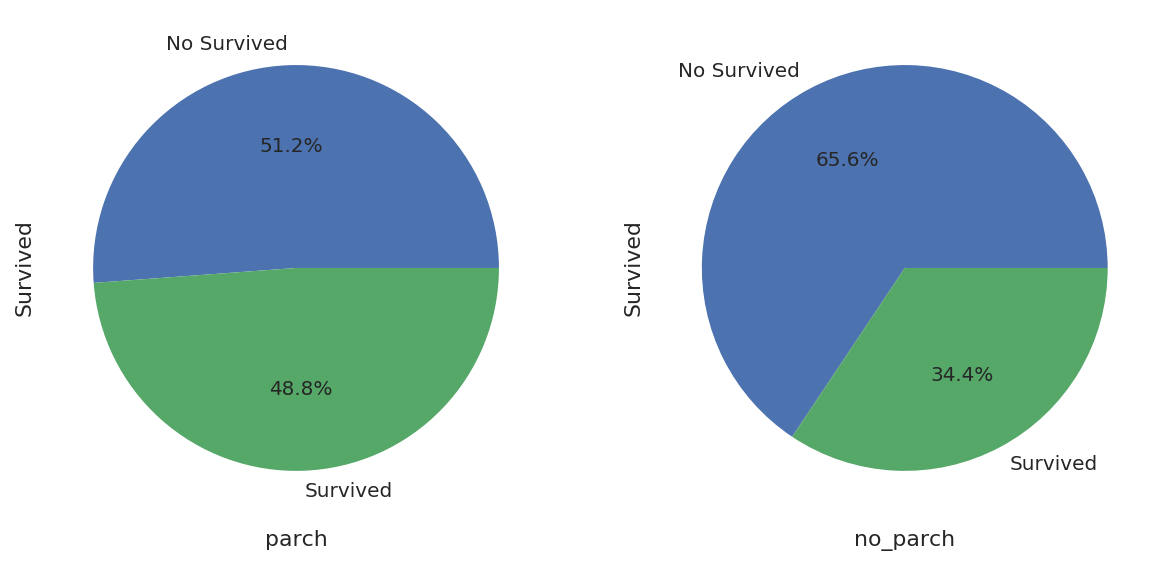

In [48]:
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()


Text(0.5, 1.0, 'SibSp and Survived')

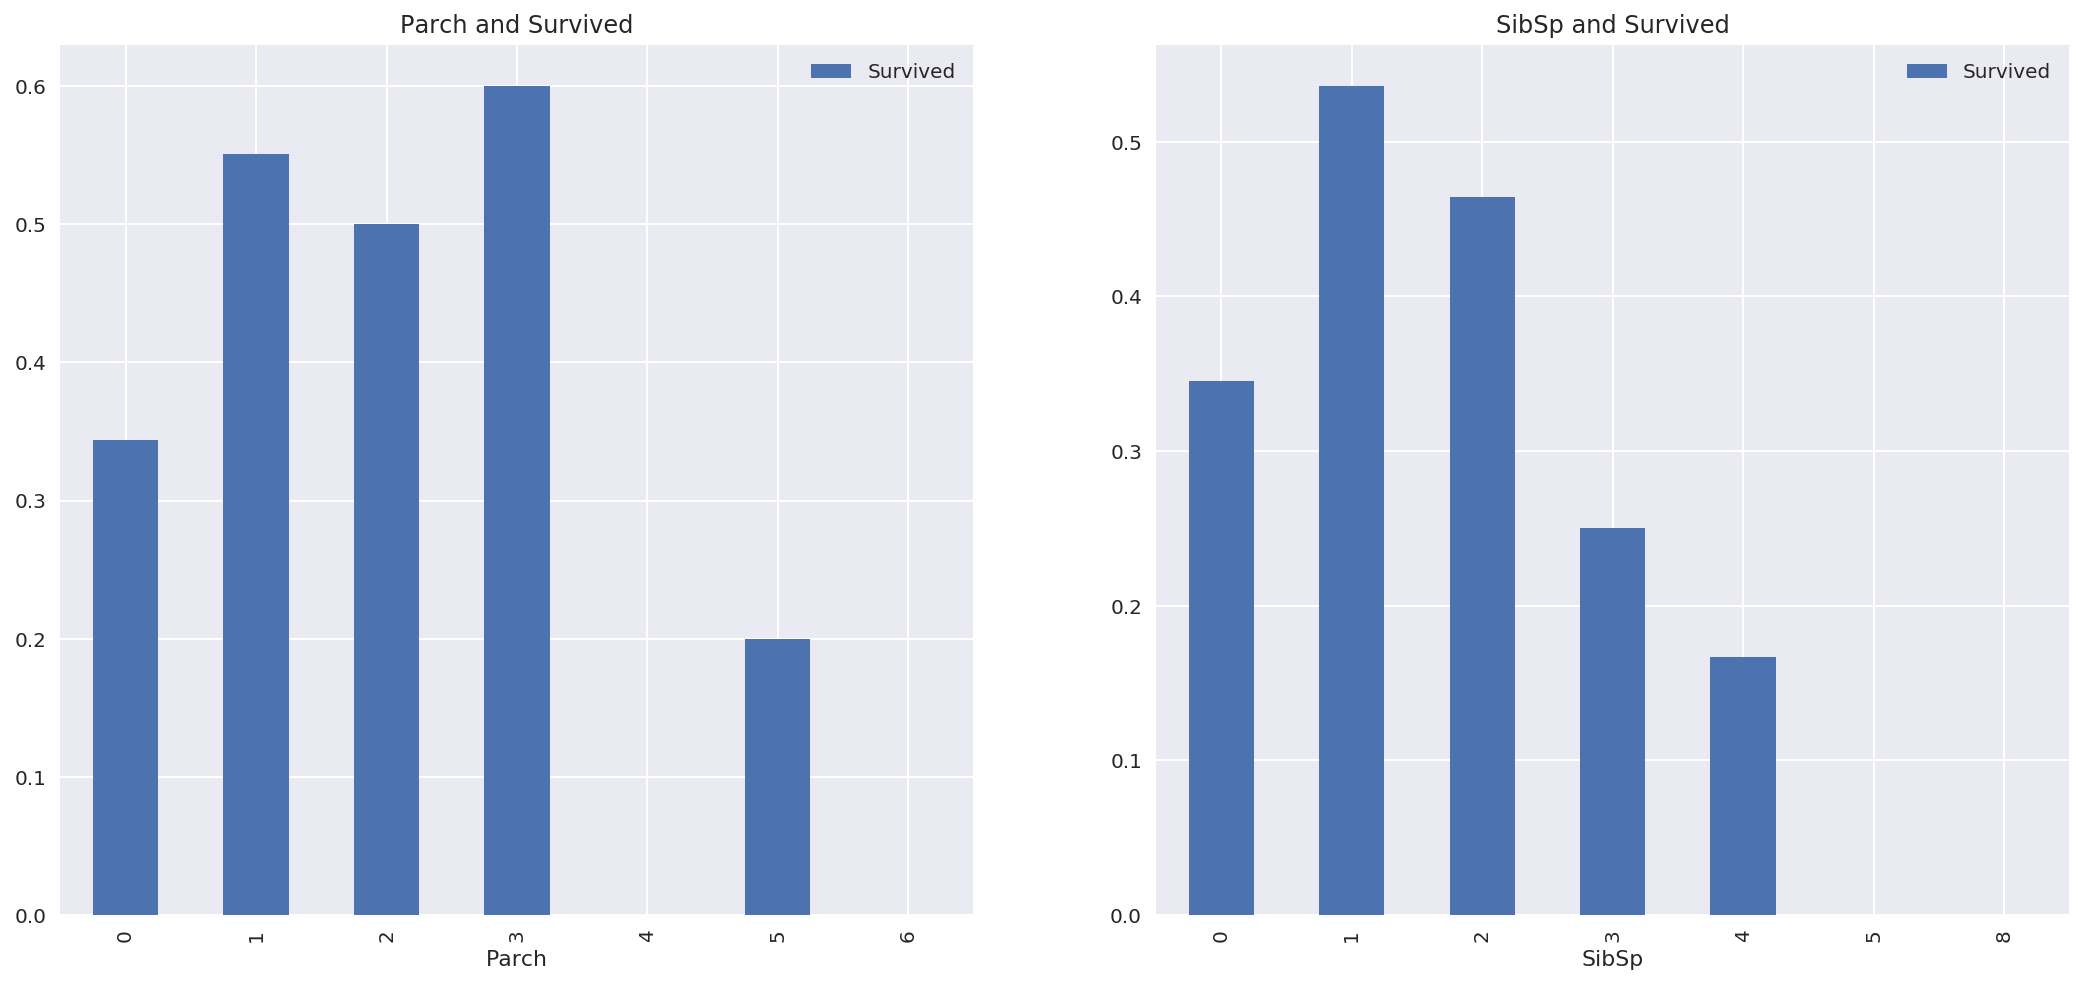

In [53]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')


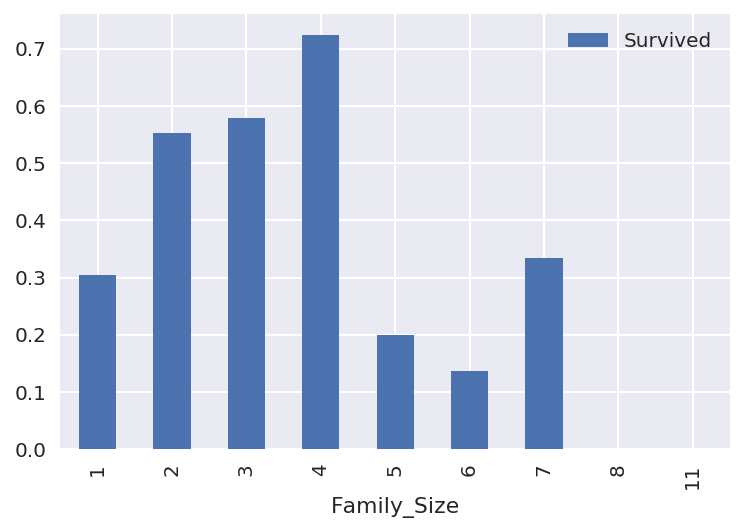

In [55]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()


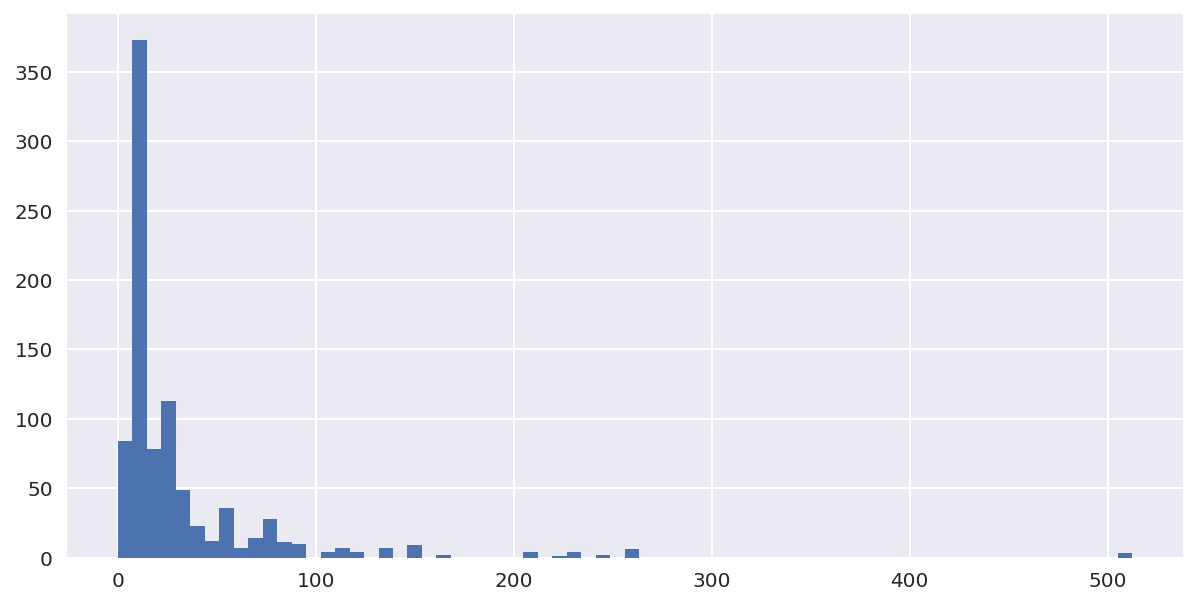

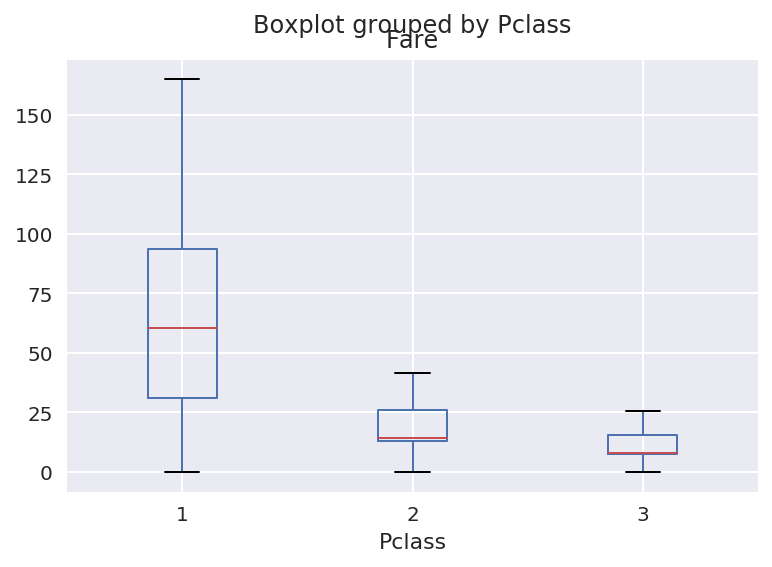

In [58]:
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)

train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

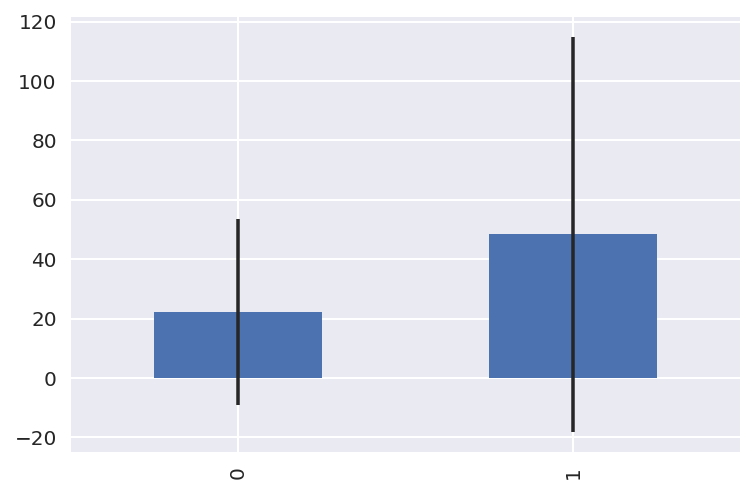

In [59]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

plt.show()

In [60]:
average_fare

,0
0,22.117887
1,48.395408


In [61]:
std_fare

,0
0,31.388207
1,66.596998


In [63]:
s = pd.Series(['a1', 'b2', 'c3'])
type(s.str.extract(r'[ab](\d)', expand=False))
type(s.str.extract(r'[ab](\d)', expand=True))

In [72]:
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'], axis=1, inplace=True)

In [74]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

In [104]:
train_data['CabinLetter'].value_counts().sort_index()

0    687
1     59
2     32
3      4
4     33
5     15
6     47
7     13
8      1
Name: CabinLetter, dtype: int64

In [109]:
train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group()).value_counts().sort_index()

A     15
B     47
C     59
D     33
E     32
F     13
G      4
T      1
U    687
Name: Cabin, dtype: int64

In [119]:
train_data['Age'].describe()

count    891.000000
mean      29.652959
std       13.730670
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape((-1,1)))

In [129]:
train_data['Age_scaled'].describe()

count    8.910000e+02
mean     1.874046e-16
std      1.000562e+00
min     -2.130222e+00
25%     -6.305460e-01
50%     -1.204521e-01
75%      5.353830e-01
max      3.668817e+00
Name: Age_scaled, dtype: float64

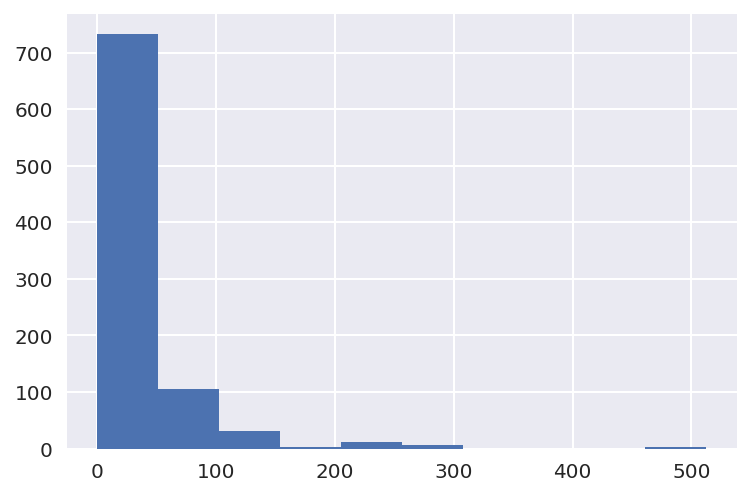

In [131]:
train_data['Fare'].hist()

In [138]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'], 5)
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [142]:
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

In [143]:
fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [146]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [147]:
df.rename(index=str, columns={"A": "a", "B": "c"})

,a,c
0,1,4
1,2,5
2,3,6


In [148]:
df.dtypes

A    int64
B    int64
dtype: object